<a href="https://colab.research.google.com/github/FatemehAbbasi166/Pathrise_Company_Project/blob/main/Feature_Engineering_pathrise_project__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
from google.colab import files

In [188]:
uploaded= files.upload()

Saving Data_Pathrise.csv to Data_Pathrise (2).csv


In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [190]:
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [192]:
df=pd.read_csv('Data_Pathrise.csv')

In [193]:
df.head(10)

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
5,6,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American
6,7,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American"
7,8,Withdrawn (Failed),SWE,AUG19A,19.0,0,Employed Part-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Citizen,4.0,15,Female,Latino or Hispanic American
8,9,Active,SWE,AUG19B,NaN,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American
9,10,Withdrawn (Trial),SWE,SEP19A,13.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,Citizen,0.0,10,Male,"Black, Afro-Caribbean, or African American"


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [195]:
df.dtypes

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

In [196]:
#Number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

program_duration_days          616
gender                         492
work_authorization_status      284
employment_status              229
professional_experience        222
number_of_interviews           218
length_of_job_search            74
highest_level_of_education      58
biggest_challenge_in_search     24
race                            18
cohort_tag                       8
id                               0
pathrise_status                  0
primary_track                    0
placed                           0
number_of_applications           0
dtype: int64

In [197]:
# The number of rows that have missing values
df[df.isnull().any(axis=1)]

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
8,9,Active,SWE,AUG19B,NaN,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American
14,15,Active,PSO,DEC19A,NaN,0,Employed Full-Time,Bachelor's Degree,1-2 months,Technical skills,1-2 years,Citizen,2.0,35,Male,Non-Hispanic White or Euro-American
15,16,Active,PSO,JAN20A,NaN,0,Employed Full-Time,Bachelor's Degree,3-5 months,Getting past mid-stage interviews,Less than one year,Citizen,1.0,25,Male,South Asian or Indian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,2537,Active,Design,FEB20B,NaN,0,Employed Full-Time,Bachelor's Degree,Over a year,Hearing back on my applications,5+ years,NaN,0.0,10,NaN,South Asian or Indian American
2537,2538,Active,SWE,JAN19B,NaN,0,Contractor,Bachelor's Degree,1-2 months,Getting past final round interviews,1-2 years,NaN,1.0,70,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American


In [198]:
# Check for unique values in categorical columns
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

pathrise_status: ['Active' 'Closed Lost' 'Placed' 'Withdrawn (Failed)' 'Withdrawn (Trial)'
 'Withdrawn' 'Deferred' 'Break' 'MIA']
primary_track: ['SWE' 'PSO' 'Design' 'Data' 'Web' 'Marketing']
cohort_tag: ['OCT19A' 'JAN20A' 'AUG19B' 'AUG19A' 'SEP19A' 'AUG19C' 'DEC19A' 'FEB20A'
 'NOV19A' 'NOV19B' 'JAN20B' 'FEB20B' 'JUL19B' 'APR20A' 'OCT18A' 'SEP18C'
 'OCT18B' 'JAN19A' 'MAR19A' 'FEB19A' 'FEB19B' 'APR19A' 'AUG18A' 'DEC18A'
 'MAR19B' 'JAN19B' 'JUN19B' 'SEP18B' 'NOV18A' 'SEP18A' 'APR19B' 'MAY19A'
 'JUL19A' 'JUN19A' 'FEB18A' 'JUN18A' 'MAR18A' 'APR18A' 'APR18B' 'MAY18A'
 'OCT21A' 'SEP19B' 'MAR20A' 'MAY19B' 'FEB20a' 'OCT19B' 'JAN18A' nan]
employment_status : ['Unemployed' 'Employed Part-Time' 'Contractor' 'Employed Full-Time'
 'Student' nan]
highest_level_of_education: ["Bachelor's Degree" 'Some College, No Degree' "Master's Degree" nan
 'Doctorate or Professional Degree' 'High School Graduate'
 'GED or equivalent' 'Some High School']
length_of_job_search: ['3-5 months' 'Less than one month' '

In [199]:
df.drop('id',axis=1,inplace=True)

In [200]:
df['program_duration_days'].isnull() #df['program_duration_days'].notnull()

0        True
1        True
2       False
3       False
4       False
        ...  
2539    False
2540    False
2541     True
2542     True
2543    False
Name: program_duration_days, Length: 2544, dtype: bool

In [201]:
 # A free trial period can withdraw without penalty during the first 2 weeks.
#If a fellow doesn't secure a job within a year, their contract is terminated.
df = df[(14 <= df['program_duration_days']) & (df['program_duration_days'] <= 365)]

In [202]:
df['program_duration_days'].isnull().unique() #df['program_duration_days'].notnull()


array([False])

In [203]:
df['program_duration_days'].describe()

count    1387.000000
mean      162.515501
std        97.218608
min        14.000000
25%        78.000000
50%       155.000000
75%       242.000000
max       365.000000
Name: program_duration_days, dtype: float64

<Axes: xlabel='program_duration_days'>

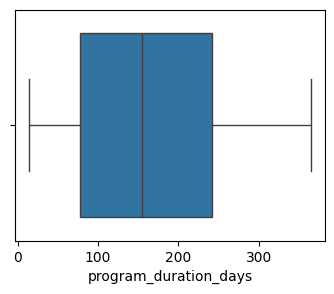

In [204]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='program_duration_days', data=df)

In [205]:
df['cohort_tag'].unique()

array(['AUG19A', 'AUG19C', 'OCT19A', 'NOV19B', 'NOV19A', 'JUL19B',
       'AUG19B', 'OCT18A', 'SEP18C', 'OCT18B', 'JAN19A', 'MAR19A',
       'FEB19A', 'FEB19B', 'APR19A', 'AUG18A', 'DEC18A', 'MAR19B',
       'JAN19B', 'JUN19B', 'SEP18B', 'NOV18A', 'SEP19A', 'SEP18A',
       'APR19B', 'JUL19A', 'JUN19A', 'JUN18A', 'MAR18A', 'APR18A',
       'APR18B', 'MAY18A', 'OCT21A', 'MAY19A', 'SEP19B', 'MAY19B',
       'DEC19A', 'OCT19B', 'JAN20A', 'JAN18A', 'FEB18A', 'FEB20A',
       'JAN20B', 'APR20A', nan, 'FEB20B', 'MAR20A', 'FEB20a'],
      dtype=object)

In [206]:
Capital_letters = lambda x: str(x).upper()
df['cohort_tag'] = df['cohort_tag'].apply(Capital_letters)
df['cohort_tag'].unique()

array(['AUG19A', 'AUG19C', 'OCT19A', 'NOV19B', 'NOV19A', 'JUL19B',
       'AUG19B', 'OCT18A', 'SEP18C', 'OCT18B', 'JAN19A', 'MAR19A',
       'FEB19A', 'FEB19B', 'APR19A', 'AUG18A', 'DEC18A', 'MAR19B',
       'JAN19B', 'JUN19B', 'SEP18B', 'NOV18A', 'SEP19A', 'SEP18A',
       'APR19B', 'JUL19A', 'JUN19A', 'JUN18A', 'MAR18A', 'APR18A',
       'APR18B', 'MAY18A', 'OCT21A', 'MAY19A', 'SEP19B', 'MAY19B',
       'DEC19A', 'OCT19B', 'JAN20A', 'JAN18A', 'FEB18A', 'FEB20A',
       'JAN20B', 'APR20A', 'NAN', 'FEB20B', 'MAR20A'], dtype=object)

In [207]:
df['cohort_tag'].value_counts()

cohort_tag
JAN19A    90
DEC18A    81
OCT18B    58
OCT18A    56
JAN19B    51
FEB19A    45
JUN19B    44
AUG19C    43
NOV18A    42
MAR19A    41
OCT19A    40
JUL19A    39
SEP18C    38
AUG18A    36
APR19A    34
SEP18A    33
AUG19B    33
SEP18B    33
JAN20A    32
FEB20A    32
SEP19B    30
AUG19A    30
JUN18A    29
JAN20B    27
FEB19B    27
JUN19A    27
JUL19B    26
MAR19B    26
DEC19A    24
SEP19A    23
MAR18A    22
APR19B    22
OCT19B    22
FEB18A    21
NOV19A    20
MAY18A    19
APR18B    18
MAY19B    14
APR18A    14
NOV19B    14
MAY19A     6
NAN        6
FEB20B     6
JAN18A     5
MAR20A     4
OCT21A     2
APR20A     2
Name: count, dtype: int64

In [208]:
df['cohort_tag'].replace(np.nan,'JAN19A',inplace=True) #Replace the most frequent

In [209]:
df['cohort_tag_month'] = df['cohort_tag'].apply(lambda x: x[:-3]) #Remove Year and Week

In [210]:
df['cohort_tag_month'].value_counts()

cohort_tag_month
JAN    205
OCT    178
SEP    157
AUG    142
FEB    131
DEC    105
JUN    100
MAR     93
APR     90
NOV     76
JUL     65
MAY     39
         6
Name: count, dtype: int64

In [211]:
df.drop('cohort_tag',axis=1,inplace=True)

In [212]:
# Separating cohort_tag to three elements
#def divide_string(a):
    # Assuming the format is always three letters, two digits, and one letter
    #letters_part = a[:3]
    #digits_part = a[3:5]
    #second_letter_part = a[5]

    #return {'Month': letters_part, 'Year': digits_part, 'Week': second_letter_part}

# Applying the function to create new columns
#df[['Month', 'Year', 'Week']] = df['cohort_tag'].apply(lambda x: pd.Series(divide_string(x)))

#df[['Month', 'Year', 'Week']]

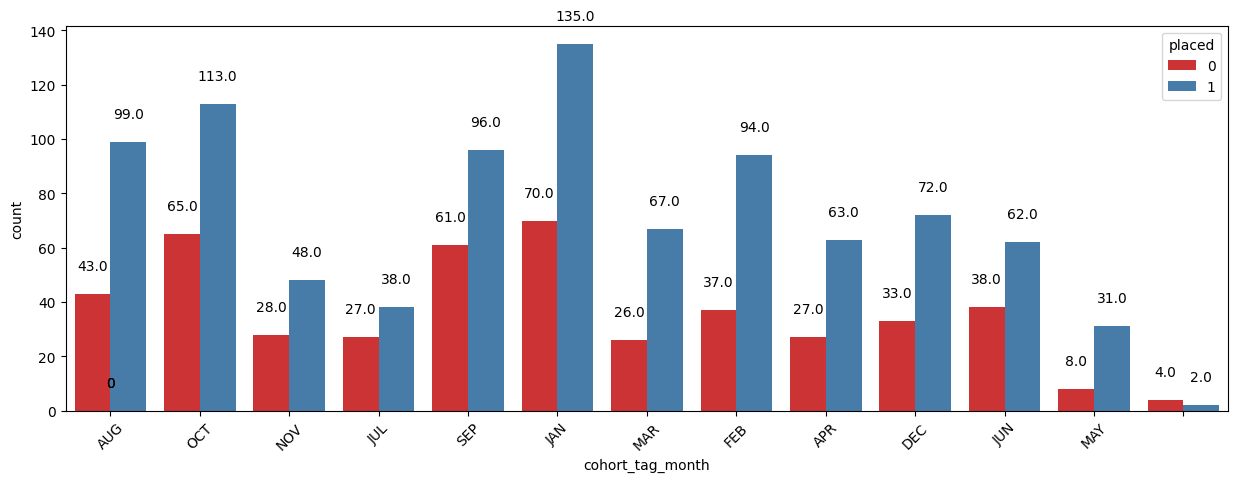

In [213]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x='cohort_tag_month', data=df , hue='placed',palette='Set1')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')


In [214]:
df['pathrise_status'].value_counts() #Sum of all except Placed is equal with 1588

pathrise_status
Placed                920
Withdrawn             378
Withdrawn (Trial)      66
Withdrawn (Failed)     23
Name: count, dtype: int64

<ipython-input-215-81094ccb19e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="pathrise_status", data=df, palette='Set1')


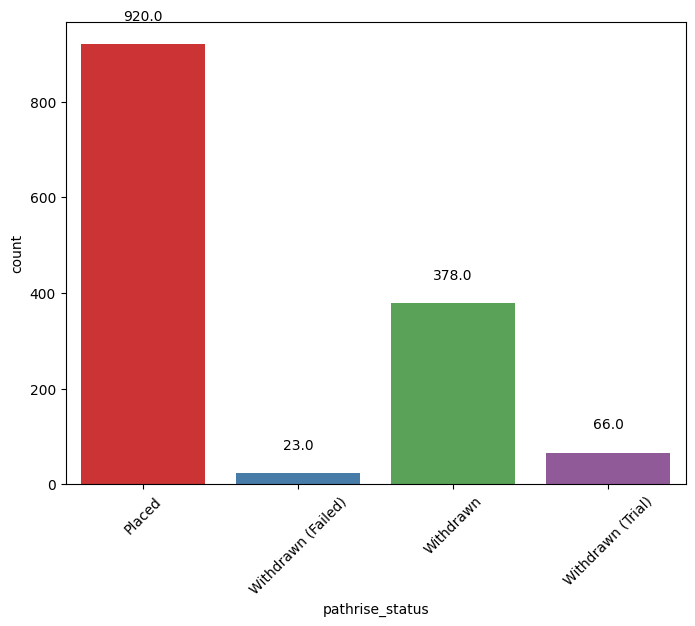

In [215]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="pathrise_status", data=df, palette='Set1')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

<ipython-input-216-1e547c1a7c18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="placed", data=df ,palette='husl')


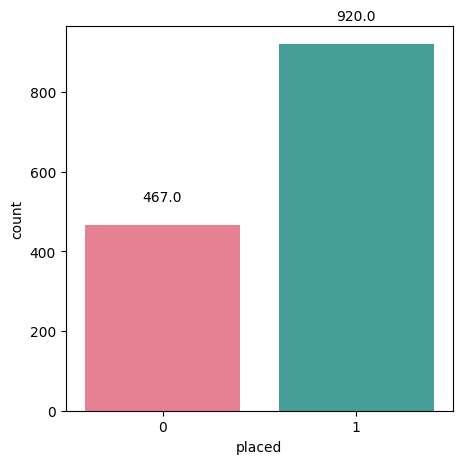

In [216]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="placed", data=df ,palette='husl')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')#???

In [217]:
df.drop('pathrise_status', axis=1, inplace=True)

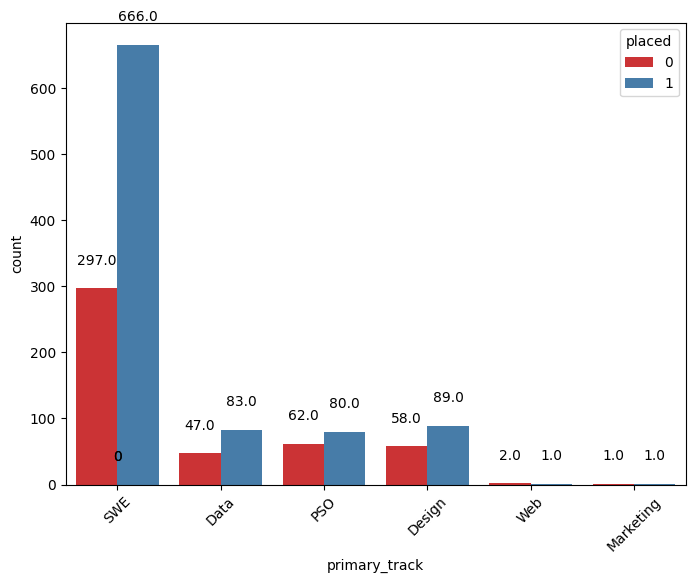

In [218]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="primary_track", data=df, hue='placed', palette='Set1')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [219]:
df['employment_status '].value_counts()

employment_status 
Student               403
Unemployed            358
Employed Full-Time    243
Employed Part-Time    157
Contractor             90
Name: count, dtype: int64

In [220]:
df['employment_status '].isnull().sum()

136

In [221]:
df['employment_status '].replace(np.nan, 'missing_status', inplace=True)

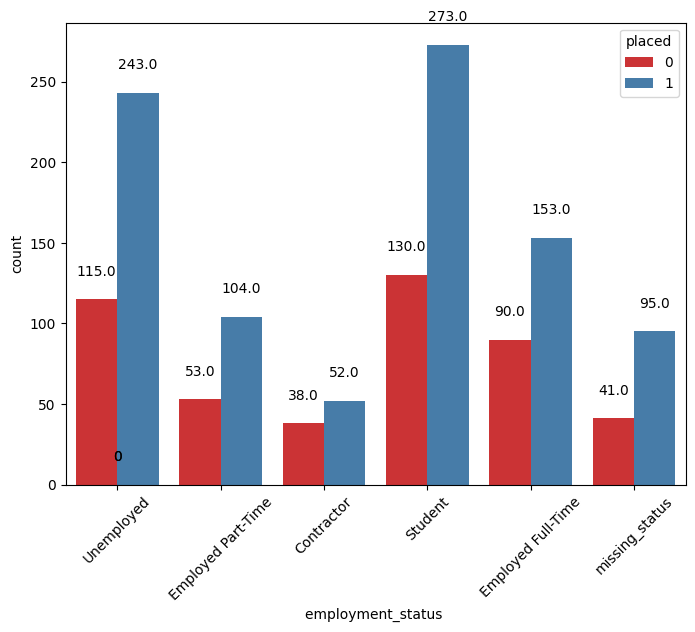

In [222]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='employment_status ', data=df, hue='placed', palette='Set1')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [223]:
df['highest_level_of_education'].value_counts()

highest_level_of_education
Bachelor's Degree                   741
Master's Degree                     428
Doctorate or Professional Degree     82
Some College, No Degree              79
GED or equivalent                    12
High School Graduate                 10
Some High School                      9
Name: count, dtype: int64

In [224]:
df['highest_level_of_education'].isnull().sum()

26

In [225]:
# Mapping categories
education_category = {
    "Bachelor's Degree": "Undergraduate",
    "Master's Degree": "Graduate",
    "Doctorate or Professional Degree": "Postgraduate",
   "Some College, No Degree": "Undergraduate" ,
    "GED or equivalent": "Diploma",
    "High School Graduate": "Diploma",
    "Some High School": "Diploma"
}

# Replace values in the 'highest_level_of_education' column
df['highest_level_of_education'] = df['highest_level_of_education'].replace(education_category)

# Verify the changes
print(df['highest_level_of_education'].value_counts())

highest_level_of_education
Undergraduate    820
Graduate         428
Postgraduate      82
Diploma           31
Name: count, dtype: int64


In [226]:
df['highest_level_of_education'].fillna('Undergraduate', inplace=True)

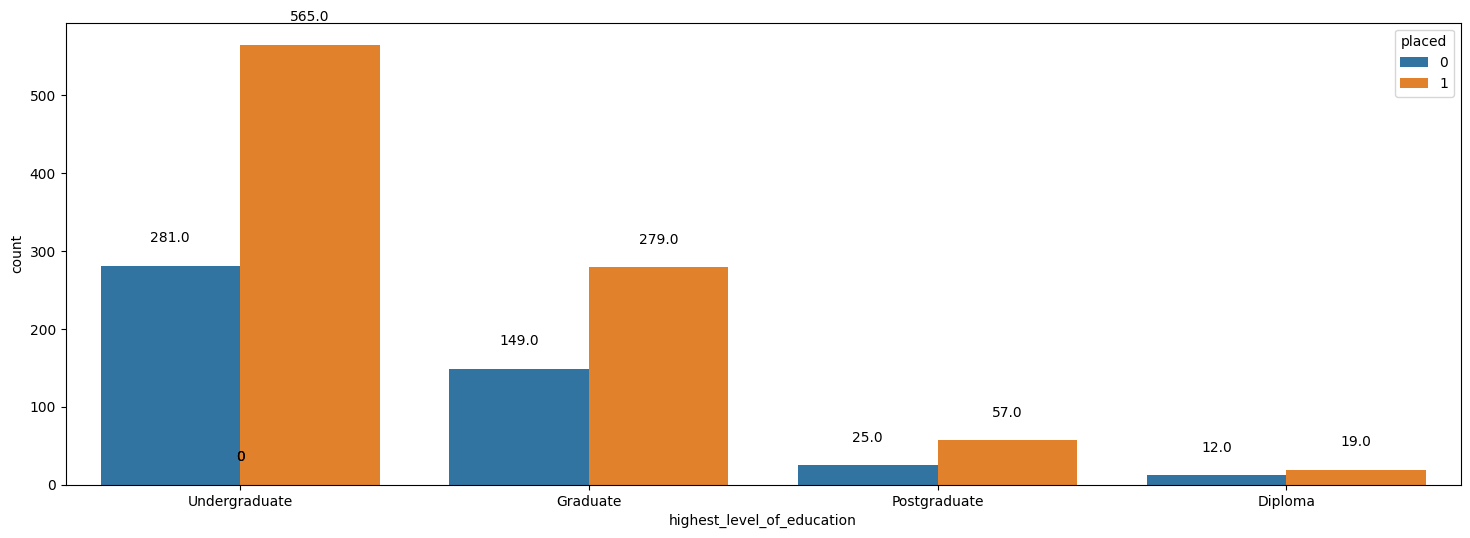

In [227]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='highest_level_of_education', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [228]:
df['length_of_job_search'].value_counts()

length_of_job_search
Less than one month    447
1-2 months             441
3-5 months             265
6 months to a year     113
Over a year             71
Name: count, dtype: int64

In [229]:
df['length_of_job_search'].isnull().sum()

50

In [230]:
df['length_of_job_search'].fillna('Less than one month', inplace=True) #Most frequent

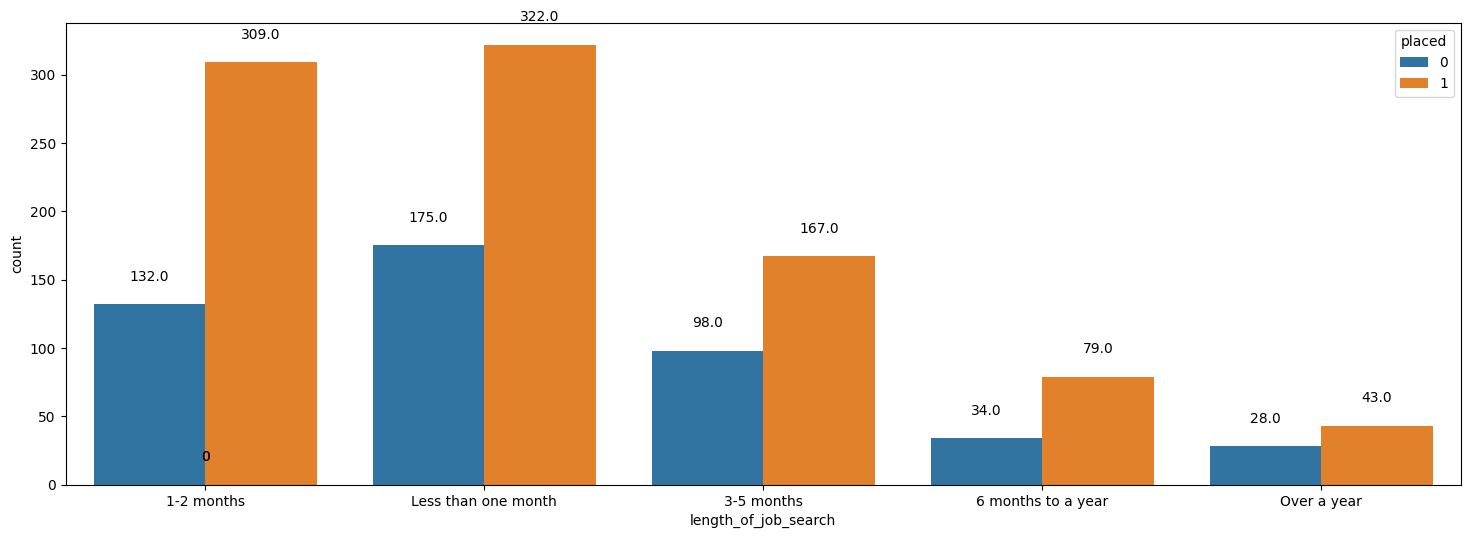

In [231]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='length_of_job_search', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [232]:
df['biggest_challenge_in_search'].value_counts()

biggest_challenge_in_search
Hearing back on my applications         531
Getting past final round interviews     169
Technical interviewing                  166
Lack of relevant experience             137
Getting past mid-stage interviews       108
Getting past phone screens              102
Figuring out which jobs to apply for     87
Behavioral interviewing                  33
Resume gap                               20
Technical skills                         18
Name: count, dtype: int64

In [233]:
df['biggest_challenge_in_search'].isna().sum()

16

In [234]:
# Mapping categories
classification = {
    'Hearing back on my applications': 'Application Process',
    'Getting past final round interviews': 'Interview Process',
    'Technical interviewing': 'Interview Process',
    'Lack of relevant experience': 'Experience Gap',
    'Getting past mid-stage interviews': 'Interview Process',
    'Figuring out which jobs to apply for': 'Job Selection',
    'Getting past phone screens': 'Interview Process',
    'Behavioral interviewing': 'Interview Process',
    'Resume gap': 'Experience Gap',
    'Technical skills': 'Skill Gap'
}

# Create broader categories
df['biggest_challenge_in_search'] = df['biggest_challenge_in_search'].replace(classification)



In [235]:
df['biggest_challenge_in_search'].value_counts()

biggest_challenge_in_search
Interview Process      578
Application Process    531
Experience Gap         157
Job Selection           87
Skill Gap               18
Name: count, dtype: int64

In [236]:
df['biggest_challenge_in_search'].fillna('Interview Process', inplace=True)

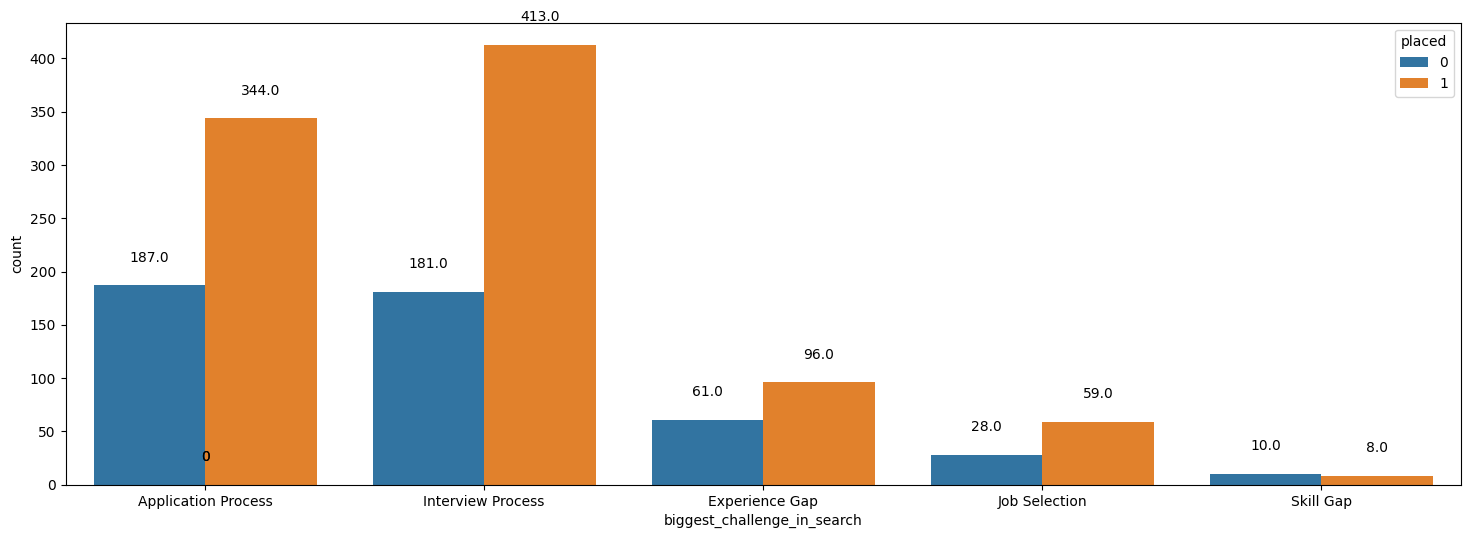

In [237]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='biggest_challenge_in_search', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [238]:
df['professional_experience'].value_counts()

professional_experience
1-2 years             470
Less than one year    341
3-4 years             323
5+ years              151
Name: count, dtype: int64

In [239]:
df['professional_experience'].isna().sum()

102

In [240]:
df['professional_experience'].fillna('Unknown', inplace=True)

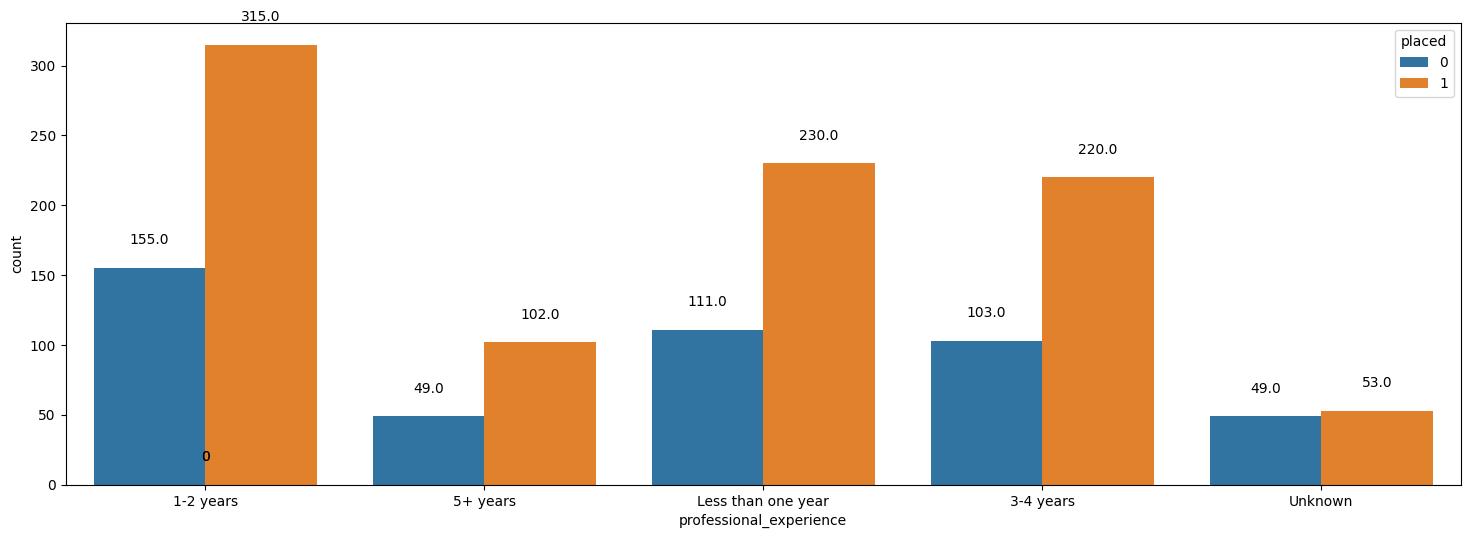

In [241]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='professional_experience', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [242]:
df.drop(['number_of_interviews','number_of_applications'], axis=1, inplace=True)#Number of interviews and applications before joining the program.

In [243]:
df['work_authorization_status'].value_counts()

work_authorization_status
Citizen           593
F1 Visa/OPT       351
Green Card        105
F1 Visa/CPT        66
Other              59
H1B                22
Canada Citizen     14
STEM OPT            5
Not Authorized      2
Name: count, dtype: int64

In [244]:
df['work_authorization_status'].isna().sum()

170

In [245]:
df['work_authorization_status'].fillna('Citizen', inplace=True)

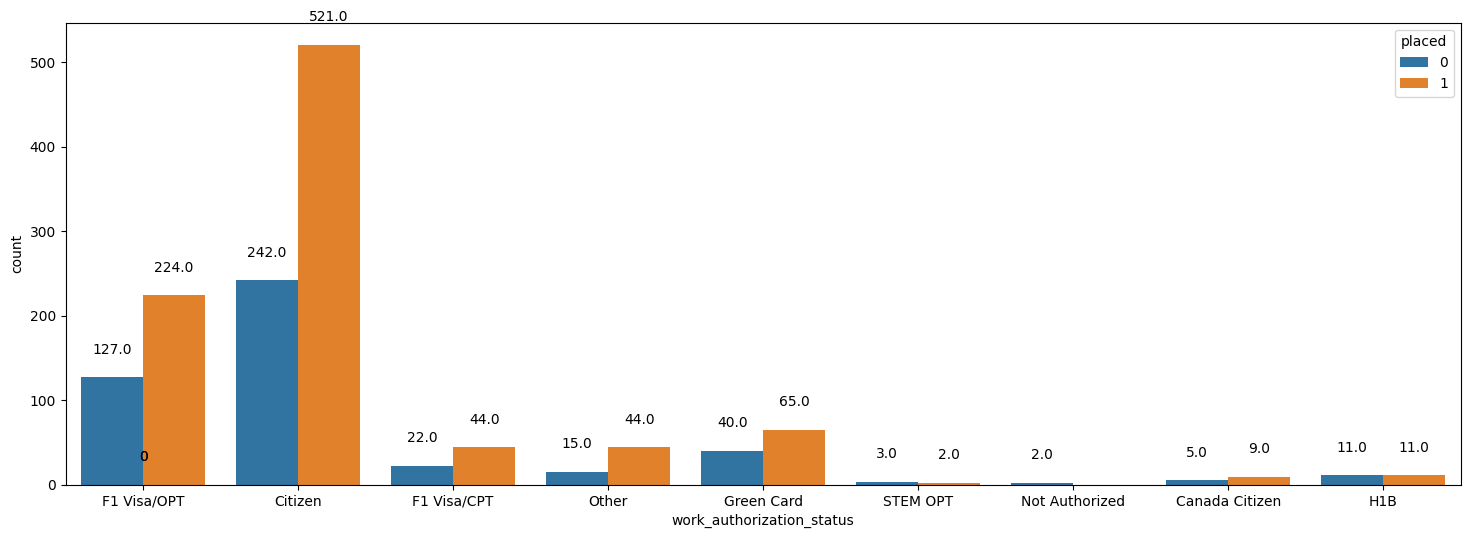

In [246]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='work_authorization_status', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [247]:
df['gender'].value_counts()

gender
Male                        836
Female                      290
Decline to Self Identify      5
Non-Binary                    2
Name: count, dtype: int64

In [248]:
df['gender'].isna().sum()

254

In [249]:
df['gender'].fillna('Decline to Self Identify', inplace=True)

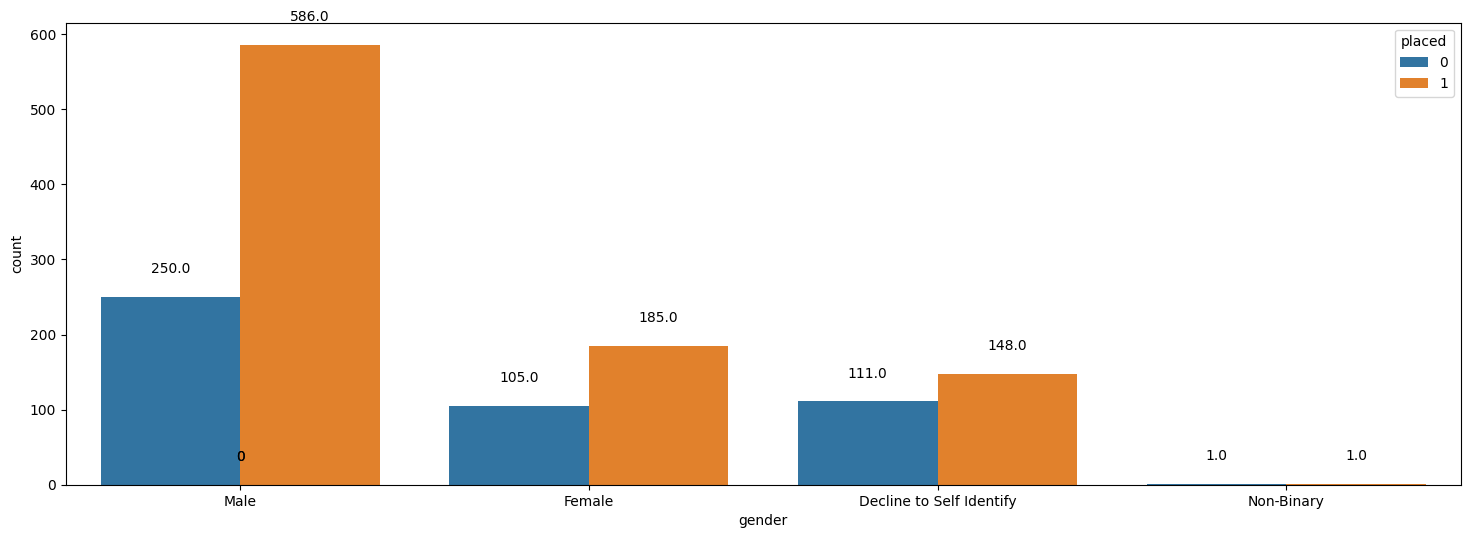

In [250]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='gender', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [251]:
df['race'].value_counts()

race
East Asian or Asian American                  512
South Asian or Indian American                324
Non-Hispanic White or Euro-American           306
Latino or Hispanic American                    73
Black, Afro-Caribbean, or African American     45
Two or More Races                              44
Middle Eastern or Arab American                41
Decline to Self Identify                       29
Native American or Alaskan Native               3
Name: count, dtype: int64

In [252]:
df['race'].isna().sum()

10

In [253]:
df['race'].fillna('Decline to Self Identify', inplace=True)

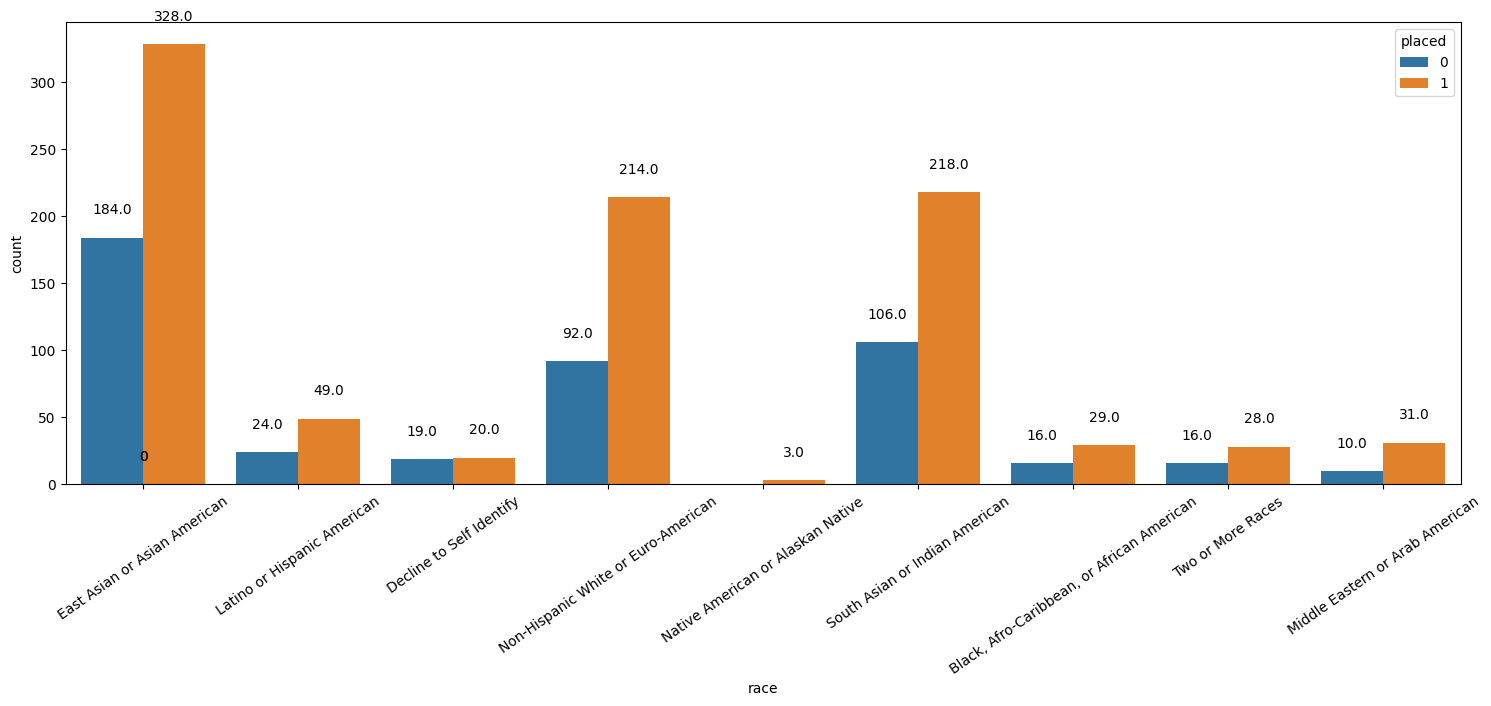

In [254]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='race', data=df , hue='placed')
ax.tick_params(axis='x', rotation=35)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [255]:
df.isnull().sum()

primary_track                  0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
gender                         0
race                           0
cohort_tag_month               0
dtype: int64

In [256]:
df_categorical_to_dummies = pd.get_dummies(df[['primary_track','employment_status ', 'highest_level_of_education', 'length_of_job_search','biggest_challenge_in_search','professional_experience','gender','race','work_authorization_status','cohort_tag_month' ]])

In [257]:
df_categorical_to_dummies

,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,employment_status _Unemployed,employment_status _missing_status,highest_level_of_education_Diploma,highest_level_of_education_Graduate,highest_level_of_education_Postgraduate,highest_level_of_education_Undergraduate,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,biggest_challenge_in_search_Application Process,biggest_challenge_in_search_Experience Gap,biggest_challenge_in_search_Interview Process,biggest_challenge_in_search_Job Selection,biggest_challenge_in_search_Skill Gap,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Unknown,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races,work_authorization_status_Canada Citizen,work_authorization_status_Citizen,work_authorization_status_F1 Visa/CPT,work_authorization_status_F1 Visa/OPT,work_authorization_status_Green Card,work_authorization_status_H1B,work_authorization_status_Not Authorized,work_authorization_status_Other,work_authorization_status_STEM OPT,cohort_tag_month_,cohort_tag_month_APR,cohort_tag_month_AUG,cohort_tag_month_DEC,cohort_tag_month_FEB,cohort_tag_month_JAN,cohort_tag_month_JUL,cohort_tag_month_JUN,cohort_tag_month_MAR,cohort_tag_month_MAY,cohort_tag_month_NOV,cohort_tag_month_OCT,cohort_tag_month_SEP
4,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
11,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
13,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
22,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...

In [258]:
# Convert boolean values to integers (0/1)
df_encoded = df_categorical_to_dummies.astype(int)

In [259]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 4 to 2543
Data columns (total 66 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   primary_track_Data                               1387 non-null   int64
 1   primary_track_Design                             1387 non-null   int64
 2   primary_track_Marketing                          1387 non-null   int64
 3   primary_track_PSO                                1387 non-null   int64
 4   primary_track_SWE                                1387 non-null   int64
 5   primary_track_Web                                1387 non-null   int64
 6   employment_status _Contractor                    1387 non-null   int64
 7   employment_status _Employed Full-Time            1387 non-null   int64
 8   employment_status _Employed Part-Time            1387 non-null   int64
 9   employment_status _Student                       1387 non

In [260]:
 df = df.drop(['primary_track','employment_status ', 'highest_level_of_education', 'length_of_job_search','biggest_challenge_in_search','professional_experience','gender','race','work_authorization_status','cohort_tag_month'] , axis=1)

In [261]:
df

,program_duration_days,placed
4,89.0,1
7,19.0,0
11,158.0,0
13,52.0,0
22,93.0,0
...,...,...
2531,310.0,1
2533,33.0,1
2534,119.0,1
2538,118.0,0


In [262]:
df = pd.concat([df,df_encoded], axis=1)

In [264]:
df_reset = df.reset_index(drop=True)

In [265]:
df_reset

,program_duration_days,placed,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,employment_status _Unemployed,employment_status _missing_status,highest_level_of_education_Diploma,highest_level_of_education_Graduate,highest_level_of_education_Postgraduate,highest_level_of_education_Undergraduate,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,biggest_challenge_in_search_Application Process,biggest_challenge_in_search_Experience Gap,biggest_challenge_in_search_Interview Process,biggest_challenge_in_search_Job Selection,biggest_challenge_in_search_Skill Gap,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Unknown,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races,work_authorization_status_Canada Citizen,work_authorization_status_Citizen,work_authorization_status_F1 Visa/CPT,work_authorization_status_F1 Visa/OPT,work_authorization_status_Green Card,work_authorization_status_H1B,work_authorization_status_Not Authorized,work_authorization_status_Other,work_authorization_status_STEM OPT,cohort_tag_month_,cohort_tag_month_APR,cohort_tag_month_AUG,cohort_tag_month_DEC,cohort_tag_month_FEB,cohort_tag_month_JAN,cohort_tag_month_JUL,cohort_tag_month_JUN,cohort_tag_month_MAR,cohort_tag_month_MAY,cohort_tag_month_NOV,cohort_tag_month_OCT,cohort_tag_month_SEP
0,89.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,19.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,158.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,52.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,93.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,310.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1383,33.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1384,119.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1385,118.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [284]:
#Standardization: rescales the date to have a mean of zero and standard deviation of one(unit variance)
from sklearn.preprocessing import StandardScaler
standardized_data= StandardScaler().fit_transform(df_reset)
dataset1 = pd.DataFrame(standardized_data, columns=df_reset.columns)
dataset1.describe()

,program_duration_days,placed,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,employment_status _Unemployed,employment_status _missing_status,highest_level_of_education_Diploma,highest_level_of_education_Graduate,highest_level_of_education_Postgraduate,highest_level_of_education_Undergraduate,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,biggest_challenge_in_search_Application Process,biggest_challenge_in_search_Experience Gap,biggest_challenge_in_search_Interview Process,biggest_challenge_in_search_Job Selection,biggest_challenge_in_search_Skill Gap,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Unknown,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races,work_authorization_status_Canada Citizen,work_authorization_status_Citizen,work_authorization_status_F1 Visa/CPT,work_authorization_status_F1 Visa/OPT,work_authorization_status_Green Card,work_authorization_status_H1B,work_authorization_status_Not Authorized,work_authorization_status_Other,work_authorization_status_STEM OPT,cohort_tag_month_,cohort_tag_month_APR,cohort_tag_month_AUG,cohort_tag_month_DEC,cohort_tag_month_FEB,cohort_tag_month_JAN,cohort_tag_month_JUL,cohort_tag_month_JUN,cohort_tag_month_MAR,cohort_tag_month_MAY,cohort_tag_month_NOV,cohort_tag_month_OCT,cohort_tag_month_SEP
count,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03
mean,-1.024575e-17,-5.122875e-18,2.561437e-17,-5.891306e-17,6.403594e-18,5.122875e-17,2.049150e-17,-1.921078e-17,3.329869e-17,1.504844e-17,9.285211e-17,7.684312e-18,4.354444e-17,2.561437e-18,1.280719e-17,6.915881e-17,3.073725e-17,4.098300e-17,6.659737e-17,5.635162e-17,4.322426e-17,1.357562e-16,3.842156e-17,2.049150e-17,9.733462e-17,9.093103e-17,2.049150e-17,5.635162e-17,2.049150e-17,6.019378e-17,3.906192e-17,1.280719e-16,6.147450e-17,-8.196600e-17,-2.561437e-17,1.024575e-16,-5.122875e-18,-7.684312e-18,-5.635162e-17,3.970228e-17,5.122875e-17,1.504844e-17,-1.536862e-17,9.317229e-17,-5.122875e-18,-2.817581e-17,2.561437e-17,-8.196600e-17,4.354444e-17,-1.793006e-17,1.024575e-17,7.684312e-18,-5.122875e-18,-4.610587e-17,3.586012e-17,-1.024575e-17,3.586012e-17,6.147450e-17,7.684312e-17,3.073725e-17,8.196600e-17,7.684312e-18,4.866731e-17,4.866731e-17,-5.250947e-17,-3.842156e-18,1.408791e-17,8.708887e-17
std,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000

<Axes: >

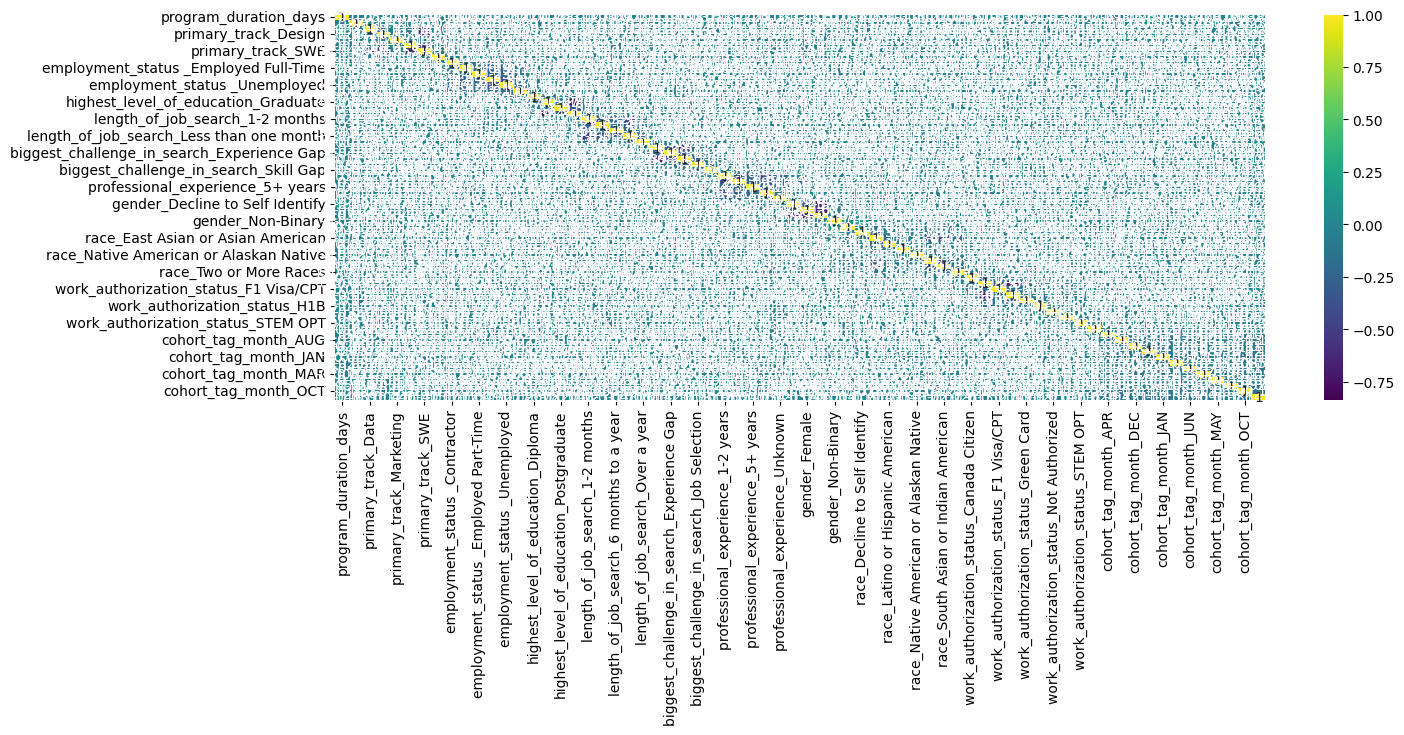

In [285]:
plt.figure(figsize = (15,5))
sns.heatmap(dataset1.corr(),cmap='viridis',annot = True)

In [286]:
dataset1.to_csv('cleaned_data.csv')